In [1]:
import pandas as pd
import os
import sys
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk

current = os.path.dirname(os.path.abspath(''))
parent = os.path.dirname(current)

sys.path.append(parent)

import normalCowboy as nc

In [2]:
run ../synthetic_fit_funcs

In [3]:
run ../analysis_funcs

In [4]:
def topNnet(net_o,n):
    net = net_o.copy()
    if isinstance(net,pd.DataFrame):
        net = net.values
    strs = np.sort(np.abs(np.tril(net,k=-1).flatten()))[::-1]
    net = net - np.diag(np.diag(net))
    return unweight(net,strs[n])

def topQnet(net_o,q=0.9):
    net = net_o.copy()
    if isinstance(net,pd.DataFrame):
        net = net.values
    qstr = np.quantile(np.abs(np.tril(net,k=-1).flatten()),q)
    net = net - np.diag(np.diag(net))
    return unweight(net,qstr)

def sigNet(net_o,q=0.9,cut=0):
    net = net_o.copy()
    if isinstance(net,pd.DataFrame):
        net = net.values
    if cut:
        cutoff = cut
    else:
        cutoff = np.quantile(np.abs(np.tril(net,k=-1).flatten()),q)
    signet = np.zeros(net.shape)
    signet[np.abs(net) >= cutoff] = net[np.abs(net) >= cutoff]
    return signet

data from 

```
@article{de2018soil,
  title={Soil bacterial networks are less stable under drought than fungal networks},
  author={de Vries, Franciska T and Griffiths, Rob I and Bailey, Mark and Craig, Hayley and Girlanda, Mariangela and Gweon, Hyun Soon and Hallin, Sara and Kaisermann, Aurore and Keith, Aidan M and Kretzschmar, Marina and others},
  journal={Nature communications},
  volume={9},
  number={1},
  pages={3033},
  year={2018},
  publisher={Nature Publishing Group UK London}
}
```

In [5]:
otu_tab_16S = pd.read_csv(os.path.join("deVries_Dat","Spc_rare_clean_16S.csv"),index_col = 0).T
otu_tab_ITS = pd.read_csv(os.path.join("deVries_Dat","Spc_rare_clean_ITS.csv"),index_col = 0).T

In [6]:
sample_data_16S = pd.read_csv(os.path.join("deVries_Dat","Env_sub_clean_16S.csv"),index_col = 0)
sample_data_ITS = pd.read_csv(os.path.join("deVries_Dat","Env_sub_clean_ITS.csv"),index_col = 0)

In [7]:
otu_tab_16S.shape

(20505, 239)

In [8]:
otu_tab_ITS.shape

(8196, 281)

In [9]:
otu_tab_16S.head()

,A01A,A01B,A01C,A01D,A02A,A02B,A02C,A02D,A03A,A03B,...,H06C,H06D,H07A,H07B,H08A,H08B,H08C,H09C,H10C,H11C
OTU20013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU20012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU20011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU20010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU20017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
otu_tab_ITS.head()

,A01A,A01B,A01C,A01D,A02A,A02B,A02C,A02D,A03A,A03B,...,H07C,H07D,H08A,H08B,H08C,H09A,H09B,H09C,H10C,H11C
OTU8107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU5077,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
OTU5076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU5075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTU5074,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
sample_data_16S[sample_data_16S["Fieldnr"] == 1]

,Fieldnr,code,Dominant,Evenness,Drought,Block,Sampling,Ao,Dg,Lh,...,Photo,CH4,N2O,X16S_ngDNA,nirS_ngDNA,nirK_ngDNA,nosZI_ngDNA,nosZII_ngDNA,AOA_ngDNA,AOB_ngDNA
A01A,1,DMD,Dactylis,Medium,1,1,1,20.48,11.75,0.85,...,-618.371470,-0.003199,-0.002086,994500.0,1002.4,5570.0,9574.0,560.735353,1734.265734,1322.307861
A01B,1,DMD,Dactylis,Medium,1,1,2,NaN,NaN,NaN,...,-98.554993,-0.016344,0.000930,800500.0,2332.0,12702.0,13652.0,568.800000,340.735294,522.058824
A01C,1,DMD,Dactylis,Medium,1,1,3,NaN,NaN,NaN,...,-473.679692,-0.008558,0.001888,1084000.0,698.2,11500.0,21180.0,931.200000,512.869565,1634.086957
B06C,1,DMD,Dactylis,Medium,1,1,4,8.05,29.88,0.38,...,-184.146534,-0.014092,0.000993,429700.0,2886.0,17730.0,33160.0,1112.800000,1314.008621,9735.560345


In [12]:
exclude = [col for col in sample_data_16S.index if col not in sample_data_ITS.index]

In [13]:
np.unique(sample_data_16S["Fieldnr"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [14]:
np.unique(sample_data_ITS["Fieldnr"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [15]:
np.unique(sample_data_16S["Block"])

array([1, 2, 3, 4])

In [16]:
sample_data_16S[sample_data_16S["Block"] == 1]

,Fieldnr,code,Dominant,Evenness,Drought,Block,Sampling,Ao,Dg,Lh,...,Photo,CH4,N2O,X16S_ngDNA,nirS_ngDNA,nirK_ngDNA,nosZI_ngDNA,nosZII_ngDNA,AOA_ngDNA,AOB_ngDNA
A01A,1,DMD,Dactylis,Medium,1,1,1,20.48,11.75,0.85,...,-618.371470,-0.003199,-0.002086,994500.0,1002.4,5570.0,9574.0,560.735353,1734.265734,1322.307861
A01B,1,DMD,Dactylis,Medium,1,1,2,NaN,NaN,NaN,...,-98.554993,-0.016344,0.000930,800500.0,2332.0,12702.0,13652.0,568.800000,340.735294,522.058824
A01C,1,DMD,Dactylis,Medium,1,1,3,NaN,NaN,NaN,...,-473.679692,-0.008558,0.001888,1084000.0,698.2,11500.0,21180.0,931.200000,512.869565,1634.086957
A01D,17,ALC,Anthox,Low,0,1,4,43.45,2.19,1.19,...,-384.209447,-0.009362,0.007742,425300.0,455.2,12962.0,25800.0,431.400000,808.412322,2089.573460
A02A,9,RLC,Rumex,Low,0,1,1,22.18,3.70,0.23,...,-758.716345,-0.035289,-0.009976,785400.0,788.6,4866.0,7690.0,665.601117,1576.425856,1210.369962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H01A,8,LLC,Leontodon,Low,0,1,1,28.78,5.13,3.51,...,-599.477999,-0.050775,-0.007399,963600.0,648.0,5028.0,8104.0,376.403226,1058.516484,1318.327085
H01B,8,LLC,Leontodon,Low,0,1,2,NaN,NaN,NaN,...,-767.654979,-0.025970,0.007213,581000.0,701.4,5670.0,7516.0,154.640000,680.612245,1551.700680
H02A,16,AMC,Anthox,Medium,0,1,1,42.91,2.39,1.73,...,-1157.283878,-0.045179,0.004005,639500.0,674.2,3682.0,6638.0,337.570498,799.511002,849.340873
H02C,16,AMC,Anthox,Medium,0,1,3,NaN,NaN,NaN,...,-707.925018,-0.021556,-0.009482,704300.0,2038.0,17290.0,26960.0,641.600000,359.219858,2435.638298


In [17]:
netposition = {'Log-Covariance':(0,0), 'CLR-Mixed':(0,1), 'CLR-Split':(1,1), 'SparCC':(1,0), 'GLASSO-Mixed':(0,2), 'GLASSO-Split':(1,2)}

In [18]:
blocks = dict([("bl{}".format(i),[s for s in sample_data_16S[sample_data_16S["Block"] == i].index if s not in exclude]) for i in np.unique(sample_data_16S["Block"])])
drought = {"Yes":[s for s in sample_data_16S[sample_data_16S["Drought"] == 1].index if s not in exclude], "No":[s for s in sample_data_16S[sample_data_16S["Drought"] == 0].index if s not in exclude]}
timept = dict([("TP{}".format(t),[s for s in sample_data_16S[sample_data_16S["Sampling"] == t] if s not in exclude]) for t in np.unique(sample_data_16S["Sampling"])])

In [19]:
np.unique(sample_data_16S["Dominant"])

array(['Anthox', 'Dactylis', 'Leontodon', 'None', 'Rumex'], dtype=object)

In [20]:
DP_split = {}
for drought in [0,1]:
    drought_dict = {}
    drought_df = sample_data_16S[sample_data_16S["Drought"] == drought]
    for plant in np.unique(sample_data_16S["Dominant"]):
        index_16s = drought_df[drought_df["Dominant"] == plant].index
        drought_dict[plant] = [s for s in index_16s if s not in exclude]
    DP_split[drought] = drought_dict

In [21]:
gao_split = {}
for block in np.unique(sample_data_16S["Block"]):
    blckindex = blocks["bl{}".format(block)]
    blck_df = sample_data_16S.loc[blckindex]
    tdictblck = {}
    for drt in [0,1]:
        drt_df = blck_df[blck_df["Drought"] == drt]
        tdictdrt = {}
        tdictdrt["Early"] = np.concatenate([drt_df[drt_df["Sampling"] == 1].index,drt_df[drt_df["Sampling"] == 2].index])
        tdictdrt["Late"] = np.concatenate([drt_df[drt_df["Sampling"] == 3].index,drt_df[drt_df["Sampling"] == 4].index])
        if drt == 0:
            tdictblck["No"] = tdictdrt
        else:
            tdictblck["Yes"] = tdictdrt
    gao_split["Bl{}".format(block)] = tdictblck

In [22]:
fourbytwosplit = {}
for block in np.unique(sample_data_16S["Block"]):
    blckindex = blocks["bl{}".format(block)]
    blck_df = sample_data_16S.loc[blckindex]
    tdictblck = {}
    for drt in [0,1]:
        drt_df = blck_df[blck_df["Drought"] == drt]
        if drt == 0:
            tdictblck["No"] = drt_df.index
        else:
            tdictblck["Yes"] = drt_df.index
    fourbytwosplit["Bl{}".format(block)] = tdictblck

In [23]:
sample_data_16S.loc[gao_split["Bl1"]["No"]["Early"]]

,Fieldnr,code,Dominant,Evenness,Drought,Block,Sampling,Ao,Dg,Lh,...,Photo,CH4,N2O,X16S_ngDNA,nirS_ngDNA,nirK_ngDNA,nosZI_ngDNA,nosZII_ngDNA,AOA_ngDNA,AOB_ngDNA
A02A,9,RLC,Rumex,Low,0,1,1,22.18,3.70,0.23,...,-758.716345,-0.035289,-0.009976,785400.0,788.6,4866.0,7690.0,665.601117,1576.425856,1210.369962
A03A,17,ALC,Anthox,Low,0,1,1,53.49,1.20,0.21,...,-863.875351,-0.021056,-0.009744,612700.0,474.2,4746.0,9872.0,626.963885,1466.832918,808.337178
B03A,18,DLC,Dactylis,Low,0,1,1,2.44,21.76,0.09,...,-468.578202,-0.053711,0.003699,957400.0,467.4,5286.0,9060.0,641.849320,1665.714286,1244.842732
E01A,5,HC,None,High,0,1,1,34.88,3.48,1.06,...,-873.500164,-0.077010,-0.017048,828200.0,604.8,4696.0,7274.0,785.882955,1585.393258,1498.267897
F01A,6,LMC,Leontodon,Medium,0,1,1,33.53,3.51,2.16,...,-773.071780,-0.028750,0.001546,792800.0,734.4,5816.0,7886.0,499.428592,1261.024499,2211.039373
G01A,7,RMC,Rumex,Medium,0,1,1,33.31,7.28,0.70,...,-726.490457,-0.039741,-0.005367,785500.0,722.2,3960.0,6880.0,481.028797,1032.048193,1498.343989
H02A,16,AMC,Anthox,Medium,0,1,1,42.91,2.39,1.73,...,-1157.283878,-0.045179,0.004005,639500.0,674.2,3682.0,6638.0,337.570498,799.511002,849.340873
A02B,9,RLC,Rumex,Low,0,1,2,NaN,NaN,NaN,...,-580.570937,-0.047933,0.005656,660100.0,1024.0,7218.0,8928.0,691.000000,441.339156,1122.998544
A03B,18,DLC,Dactylis,Low,0,1,2,NaN,NaN,NaN,...,-1011.882135,-0.048621,-0.002603,544400.0,662.2,5516.0,7486.0,588.000000,652.515091,2242.052314
B03B,17,ALC,Anthox,Low,0,1,2,NaN,NaN,NaN,...,-782.543355,-0.030312,-0.028640,319900.0,663.4,4632.0,5976.0,418.200000,312.978369,426.123128


In [24]:
DP_split.keys()

dict_keys([0, 1])

In [25]:
DP_split[1].keys()

dict_keys(['Anthox', 'Dactylis', 'Leontodon', 'None', 'Rumex'])

In [26]:
bcutoff = 0.99
bacterial = otu_tab_16S[DP_split[1]['Anthox']]
df = bacterial[(bacterial/bacterial.sum()).max(axis = 1) > np.quantile((bacterial/bacterial.sum()).max(axis = 1),bcutoff)]
df.shape

(180, 29)

In [27]:
anthox_drought_split = 180

In [28]:
fcutoff = 0.98
fungal = otu_tab_ITS[DP_split[1]['Anthox']]
df = fungal[(fungal/fungal.sum()).max(axis = 1) > np.quantile((fungal/fungal.sum()).max(axis = 1),fcutoff)]
df.shape

(164, 29)

Networks were made with "Anthox" data split, with top 2% of fungi and top 1% of bacteria

In [29]:
with open("drought_data_networks.pk",'rb') as fl:
    anthox_drought = pk.load(fl)

In [30]:
qshow = 0.9

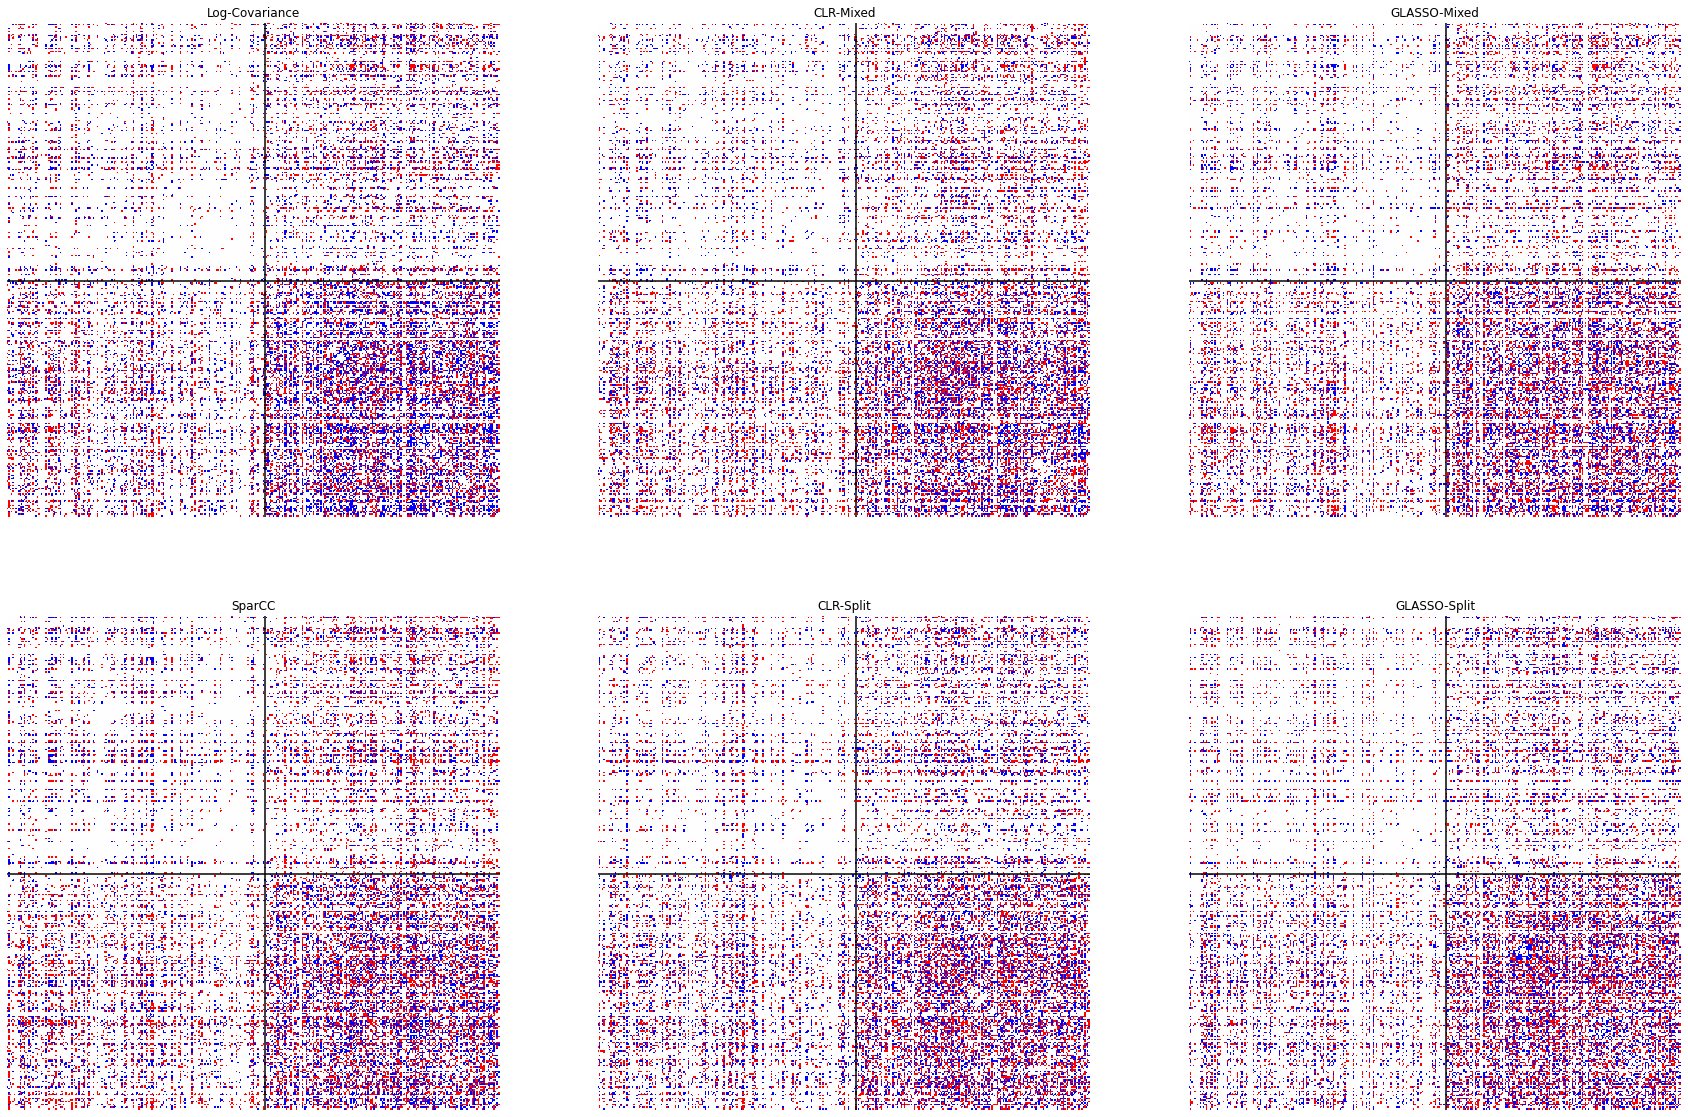

In [31]:
fig,ax = plt.subplots(2,3,figsize = (30,20))
        
for ky,val in anthox_drought.items():
    
    i,j = netposition[ky]

    ax[i,j].xaxis.set_tick_params(labelbottom=False)
    ax[i,j].yaxis.set_tick_params(labelleft=False)
    sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax[i,j])
    ax[i,j].plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
    ax[i,j].plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(ky)

In [32]:
anthox_drought.keys()

dict_keys(['Log-Covariance', 'CLR-Mixed', 'CLR-Split', 'SparCC', 'GLASSO-Mixed', 'GLASSO-Split'])

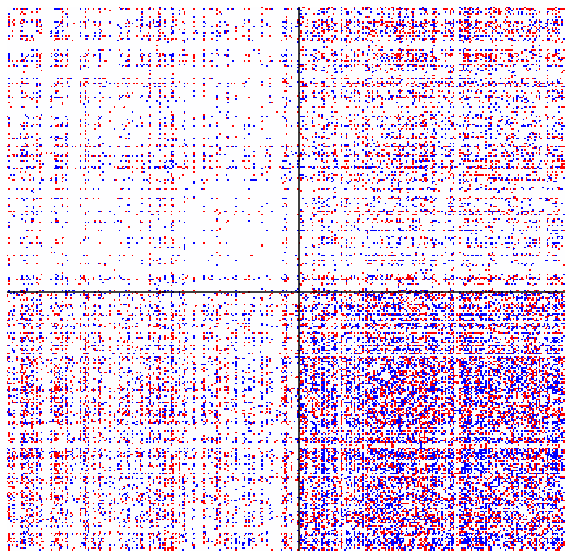

In [33]:
fig,ax = plt.subplots(figsize = (10,10))

val = anthox_drought['Log-Covariance']

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
ax.plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

ax.set_xticks([])
ax.set_yticks([]);


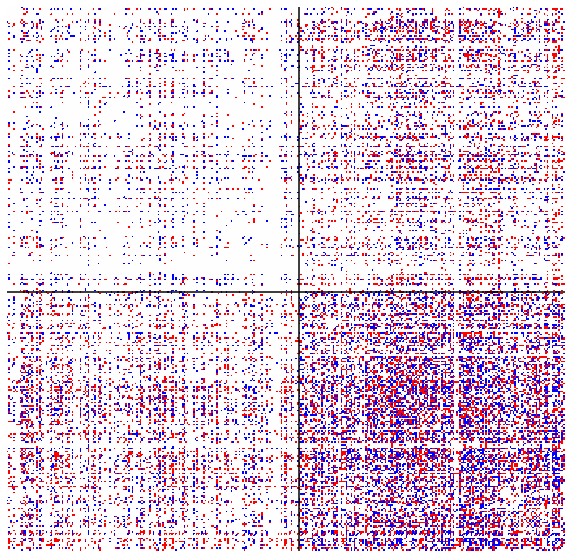

In [34]:
fig,ax = plt.subplots(figsize = (10,10))

val = anthox_drought['CLR-Mixed']

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
ax.plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

ax.set_xticks([])
ax.set_yticks([]);

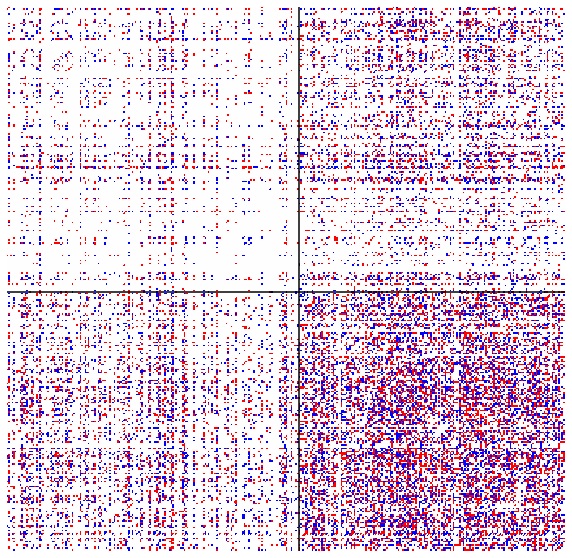

In [35]:
fig,ax = plt.subplots(figsize = (10,10))

val = anthox_drought['CLR-Split']

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
ax.plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

ax.set_xticks([])
ax.set_yticks([]);

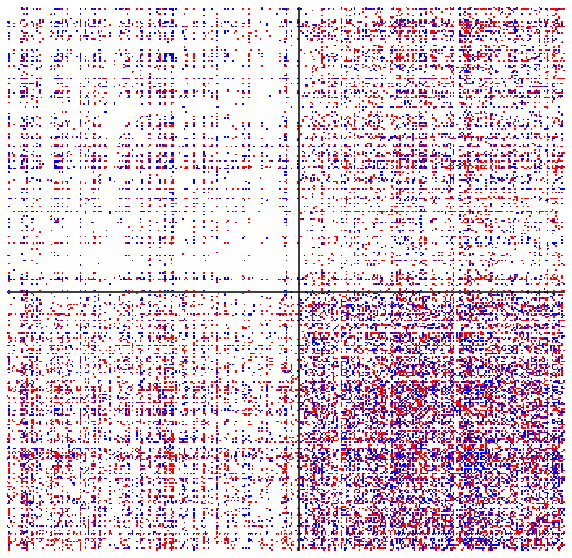

In [36]:
fig,ax = plt.subplots(figsize = (10,10))

val = anthox_drought['SparCC']

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
ax.plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

ax.set_xticks([])
ax.set_yticks([]);

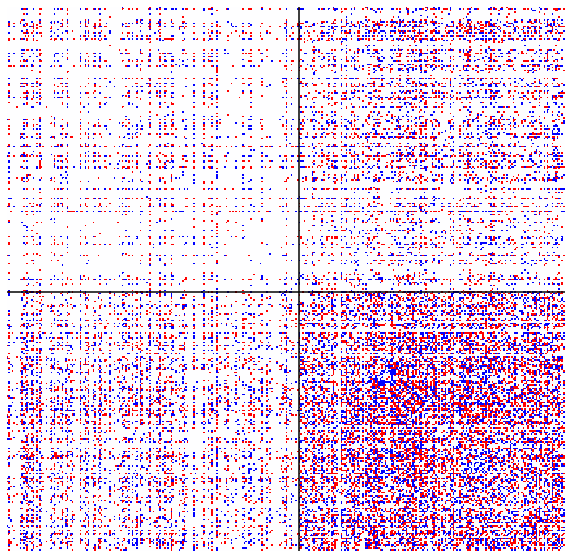

In [37]:
fig,ax = plt.subplots(figsize = (10,10))

val = anthox_drought['GLASSO-Split']

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
ax.plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

ax.set_xticks([])
ax.set_yticks([]);

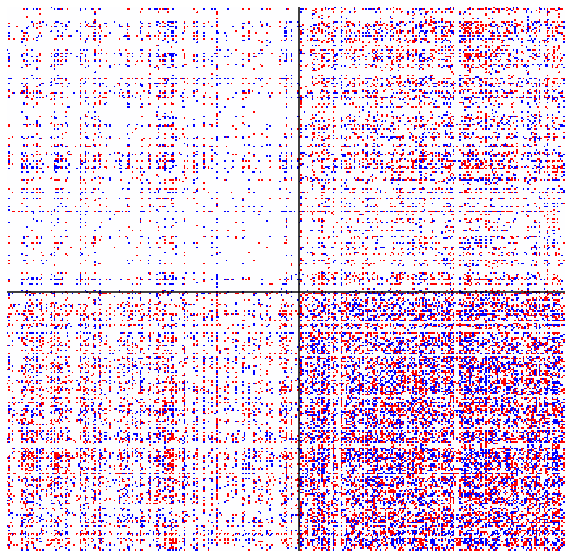

In [38]:
fig,ax = plt.subplots(figsize = (10,10))

val = anthox_drought['GLASSO-Mixed']

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
sb.heatmap(topQnet(val.round(8),qshow),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,1000],[anthox_drought_split,anthox_drought_split],color = 'k')
ax.plot([anthox_drought_split,anthox_drought_split],[0,1000],color = 'k')

ax.set_xticks([])
ax.set_yticks([]);

In [39]:
all_edges = pd.DataFrame(columns = anthox_drought.keys(),index =np.ravel_multi_index(np.triu_indices_from(anthox_drought["Log-Covariance"],k=1),anthox_drought["Log-Covariance"].shape) )
for ky,val in anthox_drought.items():
    if isinstance(val,pd.DataFrame):
        all_edges[ky] = val.values[np.triu_indices_from(val.values,k=1)]
    else:
        all_edges[ky] = val[np.triu_indices_from(val,k=1)]

In [40]:
all_edges.corr()

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.000000,0.533617,0.527791,0.706752,0.550651,0.528977
CLR-Mixed,0.533617,1.000000,0.523911,0.713530,0.559969,0.555965
CLR-Split,0.527791,0.523911,1.000000,0.695952,0.536311,0.556832
SparCC,0.706752,0.713530,0.695952,1.000000,0.740813,0.707348
GLASSO-Mixed,0.550651,0.559969,0.536311,0.740813,1.000000,0.557041
GLASSO-Split,0.528977,0.555965,0.556832,0.707348,0.557041,1.000000


In [41]:
all_edges.corr(method = "spearman")

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.000000,0.489308,0.495595,0.652608,0.496459,0.489583
CLR-Mixed,0.489308,1.000000,0.483775,0.670344,0.512988,0.508095
CLR-Split,0.495595,0.483775,1.000000,0.648761,0.491010,0.515512
SparCC,0.652608,0.670344,0.648761,1.000000,0.687755,0.652770
GLASSO-Mixed,0.496459,0.512988,0.491010,0.687755,1.000000,0.508247
GLASSO-Split,0.489583,0.508095,0.515512,0.652770,0.508247,1.000000


In [42]:
all_edges.corr(method = "kendall")

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.000000,0.359634,0.365875,0.491826,0.366006,0.361637
CLR-Mixed,0.359634,1.000000,0.356301,0.510332,0.380127,0.373975
CLR-Split,0.365875,0.356301,1.000000,0.488775,0.361667,0.383142
SparCC,0.491826,0.510332,0.488775,1.000000,0.524354,0.491618
GLASSO-Mixed,0.366006,0.380127,0.361667,0.524354,1.000000,0.373998
GLASSO-Split,0.361637,0.373975,0.383142,0.491618,0.373998,1.000000


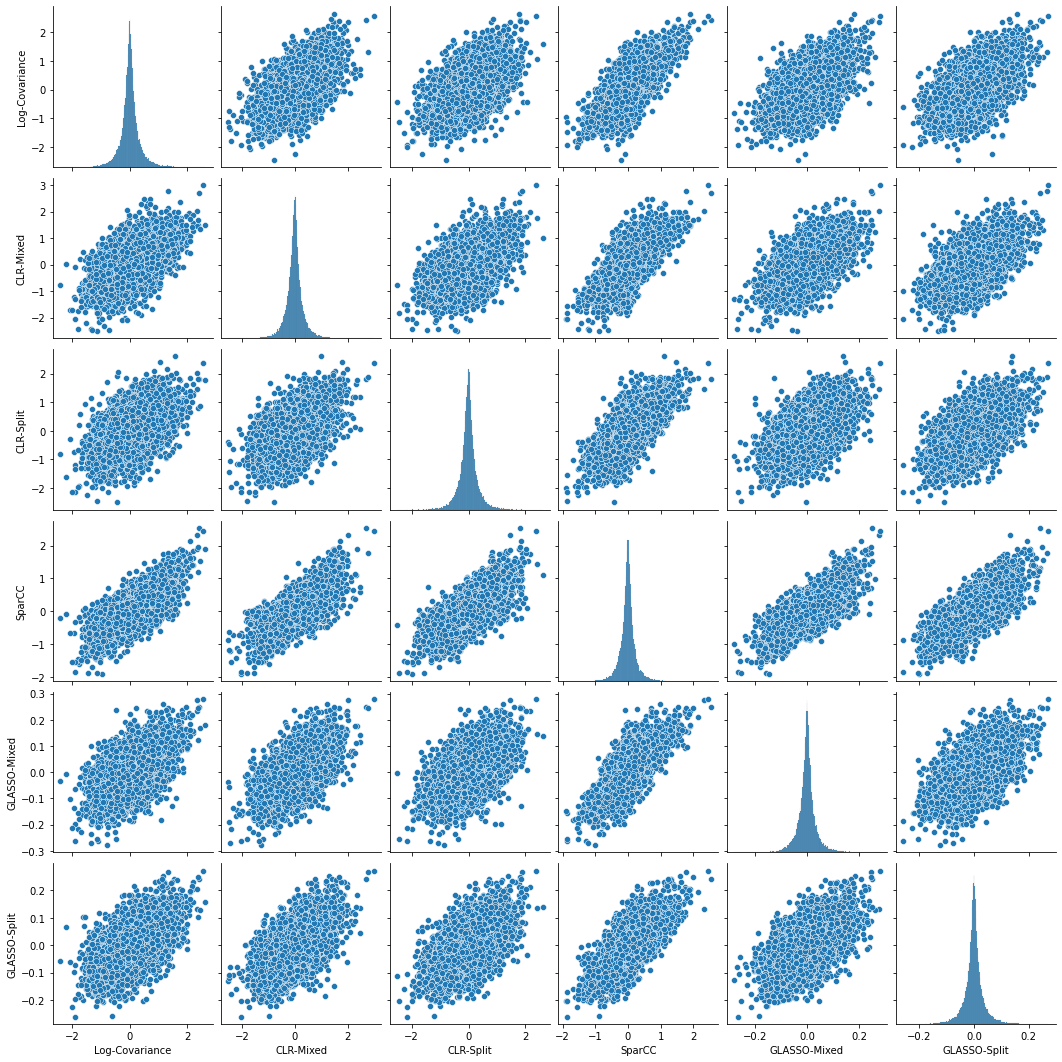

In [43]:
sb.pairplot(all_edges)

In [44]:
all_edges_ranks = pd.DataFrame(columns = all_edges.columns,index=all_edges.index)
for col in all_edges_ranks.columns:
    all_edges_ranks[col] = all_edges[col].abs().rank(ascending=False)

In [45]:
N = 10
anytop10 = all_edges_ranks[(all_edges_ranks <= N).sum(axis = 1).astype(bool)]
anytop10_df = pd.DataFrame(columns = ["Number top {}".format(N),"OTU A","OTU B"])
anytop10_df["Number top {}".format(N)] = (anytop10 <= N).sum(axis = 1)/6
for tt in anytop10.index:
    tp = np.unravel_index(tt,anthox_drought["GLASSO-Mixed"].shape)
    anytop10_df.loc[tt,"OTU A"] = anthox_drought["GLASSO-Mixed"].index[tp[0]]
    anytop10_df.loc[tt,"OTU B"] = anthox_drought["GLASSO-Mixed"].columns[tp[1]]

In [46]:
topdf = anytop10_df[anytop10_df["Number top {}".format(N)]>=0.5].sort_values("Number top {}".format(N),ascending = False)
topdf

,Number top 10,OTU A,OTU B
81823,1.000000,OTU7190,OTU7107
72229,0.666667,OTU4720,OTU4716
67069,0.500000,OTU4991,OTU4716
88015,0.500000,OTU1886,OTU7107
94899,0.500000,OTU1245,OTU1352


In [47]:
len(topdf)

5

In [48]:
Ntop = np.arange(10,210,10)
numtop = np.empty_like(Ntop)
for i,N in enumerate(Ntop):
    anytop10 = all_edges_ranks[(all_edges_ranks <= N).sum(axis = 1).astype(bool)]
    agreeprop = (anytop10 <= N).sum(axis = 1)
    numtop[i] = sum(agreeprop >=4)

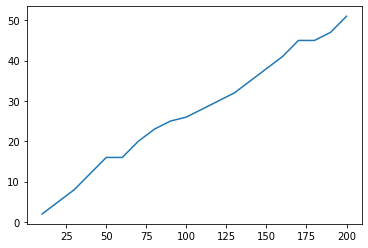

In [49]:
plt.plot(Ntop,numtop)

In [50]:
N = 10
tNbool = (all_edges_ranks <= N).astype(int)
overlaparr = np.dot(tNbool.T,tNbool)
overlap = pd.DataFrame(overlaparr,columns = all_edges_ranks.columns,index = all_edges_ranks.columns)
overlap/N

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.0,0.2,0.1,0.6,0.2,0.3
CLR-Mixed,0.2,1.0,0.1,0.2,0.2,0.3
CLR-Split,0.1,0.1,1.0,0.1,0.3,0.2
SparCC,0.6,0.2,0.1,1.0,0.2,0.3
GLASSO-Mixed,0.2,0.2,0.3,0.2,1.0,0.2
GLASSO-Split,0.3,0.3,0.2,0.3,0.2,1.0


In [51]:
absdegrees = pd.DataFrame(columns = anthox_drought.keys(),index = anthox_drought["GLASSO-Mixed"].index)
for ky,val in anthox_drought.items():
    absdegrees[ky] = np.abs(val).sum(axis = 1)/2
posdegrees = pd.DataFrame(columns = anthox_drought.keys(),index = anthox_drought["GLASSO-Mixed"].index)
for ky,val in anthox_drought.items():
    if isinstance(val,pd.DataFrame):
        tmpval = val.values.copy()
    else:
        tmpval = val.copy()
    tmpval[tmpval < 0] = 0
    posdegrees[ky] = np.abs(tmpval).sum(axis = 1)/2
negdegrees = pd.DataFrame(columns = anthox_drought.keys(),index = anthox_drought["GLASSO-Mixed"].index)
for ky,val in anthox_drought.items():
    if isinstance(val,pd.DataFrame):
        tmpval = val.values.copy()
    else:
        tmpval = val.copy()
    tmpval[tmpval > 0] = 0
    negdegrees[ky] = np.abs(tmpval).sum(axis = 1)/2

In [52]:
absdegrees.corr(method = "spearman")

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.000000,0.889864,0.897835,0.903000,0.892310,0.889302
CLR-Mixed,0.889864,1.000000,0.911613,0.905277,0.886958,0.896832
CLR-Split,0.897835,0.911613,1.000000,0.916666,0.897523,0.905397
SparCC,0.903000,0.905277,0.916666,1.000000,0.916763,0.913297
GLASSO-Mixed,0.892310,0.886958,0.897523,0.916763,1.000000,0.864496
GLASSO-Split,0.889302,0.896832,0.905397,0.913297,0.864496,1.000000


In [53]:
absdegrees.corr(method = "kendall")

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.000000,0.711574,0.717099,0.729236,0.712726,0.707743
CLR-Mixed,0.711574,1.000000,0.742322,0.738525,0.708862,0.714116
CLR-Split,0.717099,0.742322,1.000000,0.749475,0.718320,0.732931
SparCC,0.729236,0.738525,0.749475,1.000000,0.753848,0.744932
GLASSO-Mixed,0.712726,0.708862,0.718320,0.753848,1.000000,0.683131
GLASSO-Split,0.707743,0.714116,0.732931,0.744932,0.683131,1.000000


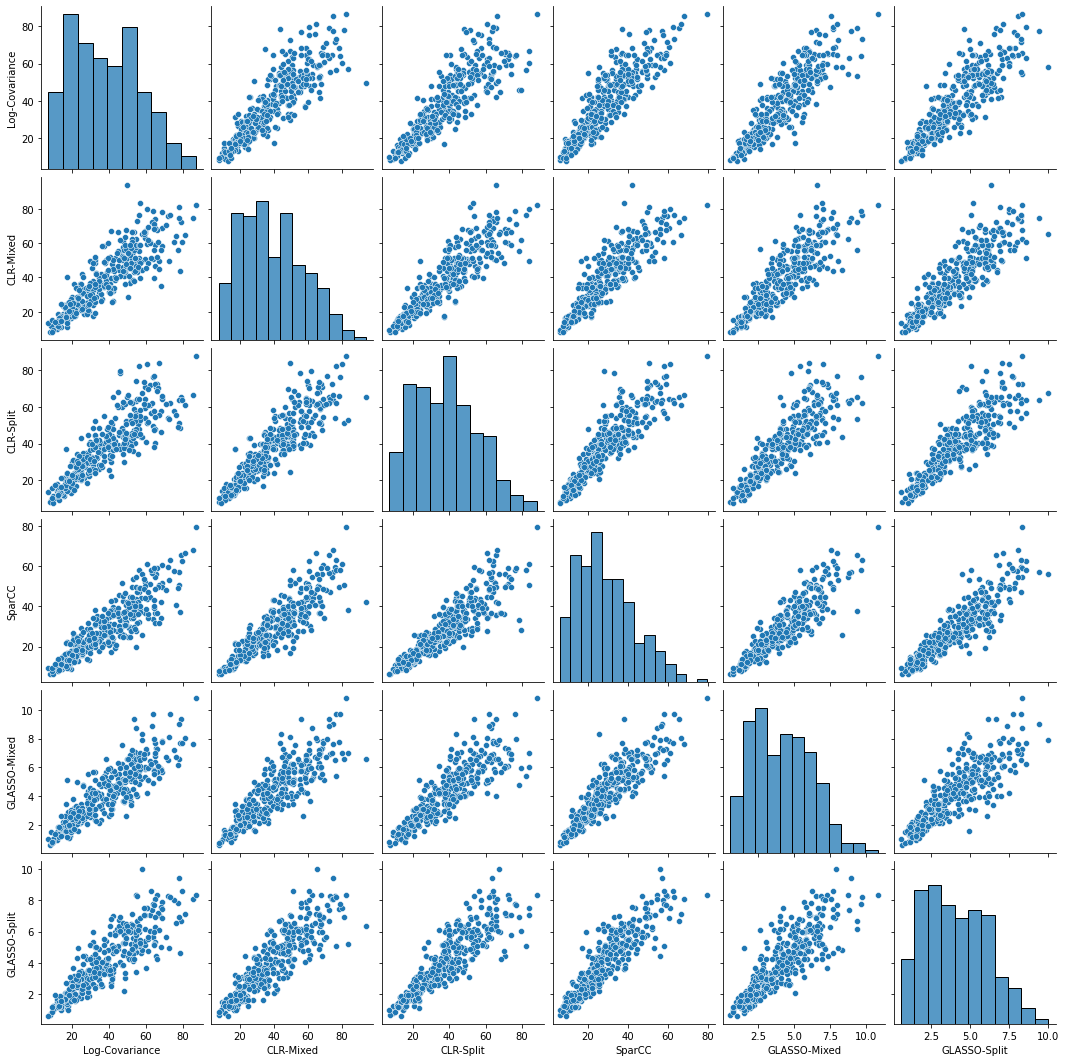

In [54]:
sb.pairplot(absdegrees)

In [55]:
all_degree_ranks = pd.DataFrame(columns = absdegrees.columns,index=absdegrees.index)
for col in absdegrees.columns:
    all_degree_ranks[col] = absdegrees[col].abs().rank(ascending=False)

In [56]:
anytop10hub = all_degree_ranks[(all_degree_ranks <= 10).sum(axis = 1).astype(bool)]

In [57]:
(anytop10hub <= 10).sum(axis = 1).sort_values(ascending = False)

OTU4716     6
OTU4509     4
OTU7107     3
OTU4991     3
OTU2009     3
OTU4720     3
OTU616      3
OTU4841     3
OTU2727     2
OTU13728    2
OTU7043     2
OTU3967     2
OTU5126     2
OTU4659     2
OTU1615     1
OTU1355     1
OTU5089     1
OTU1992     1
OTU7839     1
OTU5547     1
OTU9291     1
OTU6855     1
OTU4035     1
OTU2923     1
OTU3113     1
OTU1886     1
OTU3154     1
OTU2643     1
OTU6391     1
OTU1870     1
OTU6046     1
OTU4291     1
OTU3145     1
OTU7145     1
dtype: int64

In [58]:
N = 10
tNboolhub = (all_degree_ranks <= N).astype(int)
overlaparrhub = np.dot(tNboolhub.T,tNboolhub)
overlaphub = pd.DataFrame(overlaparrhub,columns = all_degree_ranks.columns,index = all_degree_ranks.columns)
overlaphub/N

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
Log-Covariance,1.0,0.2,0.1,0.5,0.3,0.3
CLR-Mixed,0.2,1.0,0.4,0.4,0.3,0.3
CLR-Split,0.1,0.4,1.0,0.3,0.2,0.1
SparCC,0.5,0.4,0.3,1.0,0.3,0.4
GLASSO-Mixed,0.3,0.3,0.2,0.3,1.0,0.4
GLASSO-Split,0.3,0.3,0.1,0.4,0.4,1.0


In [66]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [67]:
def bias(all_edges_in,split):
    all_edges_arr = all_edges_in.copy()
    if isinstance(all_edges_arr,pd.DataFrame):
        all_edges_arr = all_edges_arr.values
    grp1_edges = all_edges_arr[:split,:split]
    grp1_edges = grp1_edges[np.triu_indices_from(grp1_edges,k=1)]
    grp2_edges = all_edges_arr[split:,split:]
    grp2_edges = grp2_edges[np.triu_indices_from(grp2_edges,k=1)]
    xk_edges = all_edges_arr[split:,:split].flatten() #upper corner
    mannwhitney_dict = {"G1G2":mannwhitneyu(grp1_edges/np.max(np.abs(grp1_edges)),grp2_edges/np.max(np.abs(grp2_edges))).pvalue,"G1XK":mannwhitneyu(grp1_edges/np.max(np.abs(grp1_edges)),xk_edges/np.max(np.abs(xk_edges))).pvalue,"G2XK":mannwhitneyu(xk_edges/np.max(np.abs(xk_edges)),grp2_edges/np.max(np.abs(grp2_edges))).pvalue}
    tt_dict = {"G1G2":ttest_ind(grp1_edges/np.max(np.abs(grp1_edges)),grp2_edges/np.max(np.abs(grp2_edges))).pvalue,"G1XK":ttest_ind(grp1_edges/np.max(np.abs(grp1_edges)),xk_edges/np.max(np.abs(xk_edges))).pvalue,"G2XK":ttest_ind(xk_edges/np.max(np.abs(xk_edges)),grp2_edges/np.max(np.abs(grp2_edges))).pvalue}
    mean_dict = {"G1_Mean":np.mean(grp1_edges/np.max(np.abs(grp1_edges))),"G2_Mean":np.mean(grp2_edges/np.max(np.abs(grp2_edges))),"XK_Mean":np.mean(xk_edges/np.max(np.abs(xk_edges)))}
    return mean_dict,tt_dict,mannwhitney_dict

In [73]:
biases = {}
tt_p = {}
mannw_p = {}
for ky,val in anthox_drought.items():
    mn,ks,mw = bias(val,anthox_drought_split)
    biases[ky] = mn
    tt_p[ky] = ks
    mannw_p[ky] = mw

In [74]:
pd.DataFrame(biases)

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
G1_Mean,0.000183,0.007511,-1.922785e-03,0.006320,0.006424,-0.002419
G2_Mean,0.019643,0.003086,-5.397074e-03,0.003964,0.002848,-0.005397
XK_Mean,-0.002381,-0.008619,-2.632643e-19,-0.008546,-0.007913,0.000016


In [75]:
pd.DataFrame(tt_p)

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
G1G2,2.974621e-26,4.753223e-03,0.031177,1.095607e-01,4.526553e-02,0.105108
G1XK,6.944231e-02,7.083231e-50,0.127284,7.396516e-41,2.220273e-36,0.036161
G2XK,4.478717e-37,6.414974e-17,0.001257,2.074555e-21,6.391157e-12,0.000508


In [76]:
pd.DataFrame(mannw_p)

,Log-Covariance,CLR-Mixed,CLR-Split,SparCC,GLASSO-Mixed,GLASSO-Split
G1G2,1.471275e-21,2.588381e-07,0.003343,5.387891e-09,7.975706e-07,0.002663
G1XK,1.259907e-01,6.965401e-52,0.117242,7.413743e-39,2.527449e-36,0.017964
G2XK,4.203364e-23,7.428855e-09,0.000329,5.391775e-06,3.185431e-04,0.000003
